# 2000 Reports extracted based on the BERT probability
## Reports where BERT is not confident yet

In [1]:
# conda activate py37_dicom
import pandas as pd
import numpy as np

# First, run the mongoDB service on a terminal
# mongod (or sudo mongod)
from pymongo import MongoClient
client = MongoClient()

db_exams = client.chestxrays
collection = db_exams.metadata
collection.estimated_document_count()

2775902

In [2]:
def plotDistLabels(dLabels, tagLabels=None):
    
    import matplotlib.pyplot as plt
    from collections import OrderedDict
    
    if not tagLabels:
        tagLabels = dLabels.keys()
        
    for tl in tagLabels:
        if tl not in dLabels:
            dLabels[tl] = 0
            
    dLabels = OrderedDict(sorted(dLabels.items(), key=lambda t: t[0]))

    fig, ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(range(len(dLabels)), dLabels.values(), align='center')
    plt.xticks(range(len(dLabels)), dLabels.keys(), rotation='vertical')
    for i, v in enumerate(dLabels.values()):
        ax.text(i, v + max(dLabels.values())/20, '{:,}'.format(v), color='blue', fontweight='bold', rotation='vertical', verticalalignment='bottom')
    plt.show()

In [3]:
idsWanted = list(np.load('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/report_ids_BERT_2K_UNCERTAIN_1.npy', allow_pickle=True))
idsWanted = [int(i) for i in idsWanted]

In [4]:
len(idsWanted)

2000

In [5]:
len(set(idsWanted))

2000

In [6]:
ids5K = list(np.load('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/report_ids_BERT_5K_UNCERTAIN_1.npy', allow_pickle=True))

In [7]:
idWrong = 2203056
idCandidates = [i for i in ids5K if (i<idWrong + 1000) and (i>idWrong-1000) and (i not in idsWanted)]
idCandidates

[2203356, 2203757, 2202887, 2203785, 2202724]

In [8]:
idSubstitude = 2203356 # manually checked to do not be in the DB

In [9]:
idWrong in idsWanted

True

In [10]:
idSubstitude in idsWanted

False

In [11]:
idsWanted = [idSubstitude if i==idWrong else i for i in idsWanted]

In [12]:
idWrong in idsWanted

False

In [13]:
idSubstitude in idsWanted

True

In [14]:
len(idsWanted)

2000

In [15]:
# Get the data from the ones wanted:
dfReportsBERT2K1 = pd.DataFrame(list(collection.find({"_id": {"$in": idsWanted}}, {"_id", "Report", "Annotations.Report.labels", "excluded", "exclusionCode"})))
dfReportsBERT2K1["labels"] = dfReportsBERT2K1["Annotations"].apply(lambda x : x["Report"]["labels"])
dfReportsBERT2K1

_id                                             Report  \
0        3277  CT ratio is 15/29. Hump in right diaphragm as ...   
1        4283  There is marked kyphoscoliosis and generalised...   
2       12095  AN ADDENDUM HAS BEEN ENTERED AT THE END OF THI...   
3       19032  large hiatus hernia with air fluid level can b...   
4       20353  fracture neck of humerus right mid zone consol...   
...       ...                                                ...   
1995  2770596  CT Abdomen. No previous imaging for comparison...   
1996  2772495  The patient is significantly rotated to the le...   
1997  2772555  THIS REPORT HAS BEEN CHANGED. Only the upper c...   
1998  2772737  Images reviewed together. Heart size is within...   
1999  2773641  Radiograph dated 20/05/2018 reported with radi...   

                                            Annotations  \
0                            {'Report': {'labels': []}}   
1     {'Report': {'labels': ['consolidation', 'scoli...   
2     {'Report': {'labels': ['right_upper_lobe_colla...   
3                    {'Report': {'labels': ['hernia']}}   
4     {'Report': {'labels': ['hernia', 'consolidatio...   
...                                                 ...   
1995  {'Report': {'labels': ['object', 'pleural_effu...   
1996          {'Report': {'labels': ['consolidation']}}   
1997  {'Report': {'labels': ['parenchymal_lesion', '...   
1998  {'Report': {'labels': ['subcutaneous_emphysema...   
1999  {'Report': {'labels': ['cardiomegaly', 'object...   

                                                 labels  
0                                                    []  
1                            [consolidation, scoliosis]  
2       [right_upper_lobe_collapse, parenchymal_lesion]  
3                                              [hernia]  
4                               [hernia, consolidation]  
...                                                 ...  
1995                         [object, pleural_effusion]  
1996                                    [consolidation]  
1997             [parenchymal_lesion, pleural_effusion]  
1998  [subcutaneous_emphysema, object, cavitating_lu...  
1999     [cardiomegaly, object, hemidiaphragm_elevated]  

[2000 rows x 4 columns]

In [16]:
dfReportsBERT2K1[dfReportsBERT2K1["_id"] == idSubstitude]

_id                                             Report  \
1593  2203356  CT Thorax &. Reported with chest radiographs d...   

                                            Annotations  \
1593  {'Report': {'labels': ['pleural_effusion', 'ob...   

                                                 labels  
1593  [pleural_effusion, object, emphysema, pneumome...

In [17]:
for i in idsWanted:
    if (dfReportsBERT2K1["_id"] == i).sum() == 0:
        print(i)

In [18]:
# Get labels in DB
dLabelsInDB = dict()
res = collection.distinct("Annotations.Report.labels")
for i in res:
    if i == None:
        print(''.format(i))
        dLabelsInDB["None"] = 0
    else:
        dLabelsInDB[i] = 0
print(dLabelsInDB)



{'None': 0, 'aortic_calcification': 0, 'atelectasis': 0, 'bronchial_wall_thickening': 0, 'bulla': 0, 'cardiomegaly': 0, 'cavitating_lung_lesion': 0, 'clavicle_fracture': 0, 'consolidation': 0, 'dextrocardia': 0, 'dilated_bowel': 0, 'emphysema': 0, 'ground_glass_opacification': 0, 'hemidiaphragm_elevated': 0, 'hernia': 0, 'hyperexpanded_lungs': 0, 'interstitial_shadowing': 0, 'left_lower_lobe_collapse': 0, 'left_upper_lobe_collapse': 0, 'mediastinum_displaced': 0, 'mediastinum_widened': 0, 'normal': 0, 'object': 0, 'paratracheal_hilar_enlargement': 0, 'parenchymal_lesion': 0, 'pleural_abnormality': 0, 'pleural_effusion': 0, 'pneumomediastinum': 0, 'pneumoperitoneum': 0, 'pneumothorax': 0, 'rib_fracture': 0, 'rib_lesion': 0, 'right_lower_lobe_collapse': 0, 'right_middle_lobe_collapse': 0, 'right_upper_lobe_collapse': 0, 'scoliosis': 0, 'subcutaneous_emphysema': 0, 'unfolded_aorta': 0}


In [19]:
dLabelsInSet = dict()
for i, doc in dfReportsBERT2K1.iterrows():
    if not doc['labels']:
        dLabelsInSet["None"] = dLabelsInSet["None"] + 1 if "None" in dLabelsInSet else 1
    for l in doc['labels']:
        dLabelsInSet[l] = dLabelsInSet[l] + 1 if l in dLabelsInSet else 1
print(dLabelsInSet)

{'None': 189, 'consolidation': 338, 'scoliosis': 230, 'right_upper_lobe_collapse': 56, 'parenchymal_lesion': 435, 'hernia': 253, 'hemidiaphragm_elevated': 213, 'atelectasis': 309, 'normal': 12, 'cardiomegaly': 510, 'mediastinum_widened': 18, 'unfolded_aorta': 108, 'interstitial_shadowing': 224, 'emphysema': 194, 'bronchial_wall_thickening': 83, 'object': 296, 'paratracheal_hilar_enlargement': 141, 'pleural_effusion': 363, 'pleural_abnormality': 195, 'hyperexpanded_lungs': 175, 'aortic_calcification': 64, 'rib_fracture': 96, 'right_lower_lobe_collapse': 18, 'clavicle_fracture': 24, 'bulla': 21, 'pneumothorax': 75, 'pneumoperitoneum': 15, 'left_lower_lobe_collapse': 41, 'cavitating_lung_lesion': 74, 'subcutaneous_emphysema': 27, 'dextrocardia': 2, 'ground_glass_opacification': 34, 'mediastinum_displaced': 22, 'rib_lesion': 20, 'right_middle_lobe_collapse': 16, 'pneumomediastinum': 5, 'dilated_bowel': 2, 'left_upper_lobe_collapse': 23}


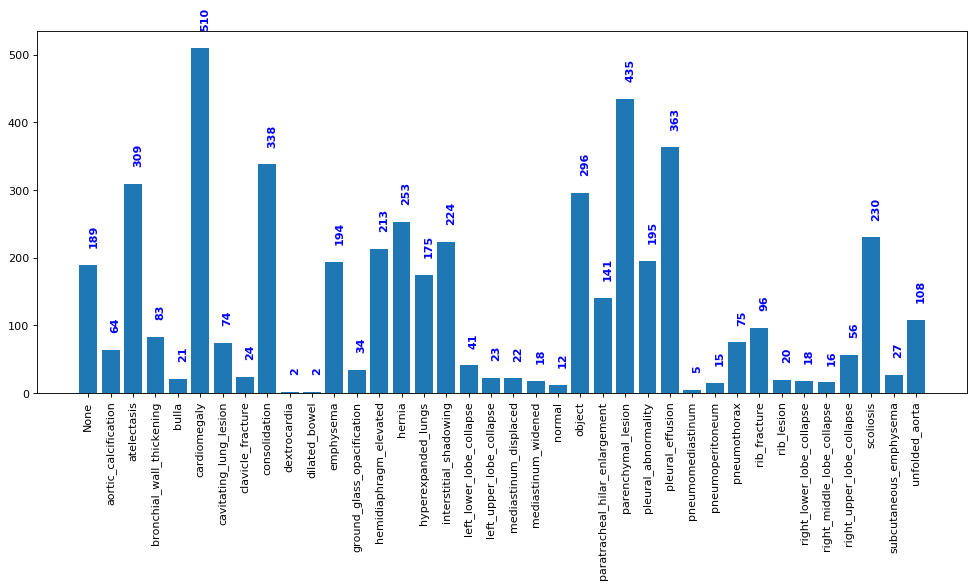

In [20]:
plotDistLabels(dLabelsInSet, tagLabels=dLabelsInDB.keys())

In [21]:
dfReportsBERT2K1.iloc[0:1000]

_id                                             Report  \
0       3277  CT ratio is 15/29. Hump in right diaphragm as ...   
1       4283  There is marked kyphoscoliosis and generalised...   
2      12095  AN ADDENDUM HAS BEEN ENTERED AT THE END OF THI...   
3      19032  large hiatus hernia with air fluid level can b...   
4      20353  fracture neck of humerus right mid zone consol...   
..       ...                                                ...   
995  1455765  Comparison made with the previous film. There ...   
996  1457290  Very enlarged heart. The shape is unusual with...   
997  1457573  Comparison to previous chest x-ray of 4 Octobe...   
998  1461447  No previous CXR. The heart is enlarged and the...   
999  1462277  The AP supine chest radiograph. Rotated film. ...   

                                           Annotations  \
0                           {'Report': {'labels': []}}   
1    {'Report': {'labels': ['consolidation', 'scoli...   
2    {'Report': {'labels': ['right_upper_lobe_colla...   
3                   {'Report': {'labels': ['hernia']}}   
4    {'Report': {'labels': ['hernia', 'consolidatio...   
..                                                 ...   
995          {'Report': {'labels': ['consolidation']}}   
996  {'Report': {'labels': ['cardiomegaly', 'pleura...   
997  {'Report': {'labels': ['parenchymal_lesion', '...   
998  {'Report': {'labels': ['cardiomegaly', 'atelec...   
999  {'Report': {'labels': ['cardiomegaly', 'consol...   

                                                labels  
0                                                   []  
1                           [consolidation, scoliosis]  
2      [right_upper_lobe_collapse, parenchymal_lesion]  
3                                             [hernia]  
4                              [hernia, consolidation]  
..                                                 ...  
995                                    [consolidation]  
996  [cardiomegaly, pleural_effusion, hemidiaphragm...  
997                [parenchymal_lesion, consolidation]  
998      [cardiomegaly, atelectasis, pleural_effusion]  
999                      [cardiomegaly, consolidation]  

[1000 rows x 4 columns]

In [22]:
dfReportsBERT2K1.iloc[1000:2000]

_id                                             Report  \
1000  1464297  No evidence of pneumoperitoneum. There is atel...   
1001  1464344  AP semi-erect. Prior sternotomy. There is a ca...   
1002  1465874  No focal active lung lesion is seen. There is ...   
1003  1466144  Prominent eventrations of the hemidiaphragms. ...   
1004  1466446  PA view. Comparison to previous examination da...   
...       ...                                                ...   
1995  2770596  CT Abdomen. No previous imaging for comparison...   
1996  2772495  The patient is significantly rotated to the le...   
1997  2772555  THIS REPORT HAS BEEN CHANGED. Only the upper c...   
1998  2772737  Images reviewed together. Heart size is within...   
1999  2773641  Radiograph dated 20/05/2018 reported with radi...   

                                            Annotations  \
1000            {'Report': {'labels': ['atelectasis']}}   
1001  {'Report': {'labels': ['interstitial_shadowing...   
1002                         {'Report': {'labels': []}}   
1003  {'Report': {'labels': ['paratracheal_hilar_enl...   
1004  {'Report': {'labels': ['scoliosis', 'emphysema...   
...                                                 ...   
1995  {'Report': {'labels': ['object', 'pleural_effu...   
1996          {'Report': {'labels': ['consolidation']}}   
1997  {'Report': {'labels': ['parenchymal_lesion', '...   
1998  {'Report': {'labels': ['subcutaneous_emphysema...   
1999  {'Report': {'labels': ['cardiomegaly', 'object...   

                                                 labels  
1000                                      [atelectasis]  
1001       [interstitial_shadowing, parenchymal_lesion]  
1002                                                 []  
1003      [paratracheal_hilar_enlargement, atelectasis]  
1004  [scoliosis, emphysema, atelectasis, unfolded_a...  
...                                                 ...  
1995                         [object, pleural_effusion]  
1996                                    [consolidation]  
1997             [parenchymal_lesion, pleural_effusion]  
1998  [subcutaneous_emphysema, object, cavitating_lu...  
1999     [cardiomegaly, object, hemidiaphragm_elevated]  

[1000 rows x 4 columns]

In [23]:
dfReportsBERT2K1.iloc[0:1000].to_csv('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/selReports_BERT_2K_UNCERTAIN_1_1.csv', index=False, columns=["_id", "Report", "labels"], sep='$', encoding='utf-8')
dfReportsBERT2K1.iloc[1000:2000].to_csv('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/selReports_BERT_2K_UNCERTAIN_1_2.csv', index=False, columns=["_id", "Report", "labels"], sep='$', encoding='utf-8')

# Add fnDcm to upload the x-rays to annotateX

In [25]:
dfReportsBERT2K1_1 = pd.read_csv('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/in_AnnotateX/selReports_BERT_2K_UNCERTAIN_1_1.csv', sep='$', encoding='utf-8')
dfReportsBERT2K1_2 = pd.read_csv('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/in_AnnotateX/selReports_BERT_2K_UNCERTAIN_1_2.csv', sep='$', encoding='utf-8')

In [26]:
dfMetadata_1 = pd.DataFrame(list(collection.find({"_id": {"$in": list(dfReportsBERT2K1_1['_id'])}}, {"_id", "bestAltFnDcm"})))
dfMetadata_2 = pd.DataFrame(list(collection.find({"_id": {"$in": list(dfReportsBERT2K1_2['_id'])}}, {"_id", "bestAltFnDcm"})))

In [27]:
dfReportsBERT2K1_1 = pd.merge(dfReportsBERT2K1_1, dfMetadata_1, on="_id")
dfReportsBERT2K1_2 = pd.merge(dfReportsBERT2K1_2, dfMetadata_2, on="_id")

In [28]:
dfReportsBERT2K1_1.rename(columns={"bestAltFnDcm": "fnDcm"}, inplace=True)
dfReportsBERT2K1_2.rename(columns={"bestAltFnDcm": "fnDcm"}, inplace=True)

In [29]:
pathdata = '/BigData/chest_xrays/data'
dfReportsBERT2K1_1['fnDcm'] =  dfReportsBERT2K1_1['fnDcm'].apply(lambda x : x.replace('$PATHDATA', pathdata))
dfReportsBERT2K1_2['fnDcm'] =  dfReportsBERT2K1_2['fnDcm'].apply(lambda x : x.replace('$PATHDATA', pathdata))

In [30]:
dfReportsBERT2K1_1.to_csv('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/in_AnnotateX/selReports_BERT_2K_UNCERTAIN_1_1_fnDcm.csv', index=False, columns=["_id", "Report", "labels", "fnDcm"], sep='$', encoding='utf-8')
dfReportsBERT2K1_2.to_csv('/montana-storage02/chest_xrays/data_reports/ReportsForAnnotateX/BERT-based_extractions/in_AnnotateX/selReports_BERT_2K_UNCERTAIN_1_2_fnDcm.csv', index=False, columns=["_id", "Report", "labels", "fnDcm"], sep='$', encoding='utf-8')